In [84]:
from importlib import reload
import utils_tf as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import IPython
import IPython.display
import matplotlib as mpl
import pandas as pd
import seaborn as sns

reload(u)

# This file is used to configure settings use for training

path = "./data/all_data.csv"
df = pd.read_csv(path)

df_cons = df[["y"]]
df_cons = df_cons.dropna()

# column_indices = {name: i for i, name in enumerate(df_cons.columns)}

n = len(df_cons)
train_df = df_cons[0 : int(n * 0.7)]
val_df = df_cons[int(n * 0.7) : int(n * 0.9)]
test_df = df_cons[int(n * 0.9) :]

num_features = 1

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [85]:
lstm_model = keras.models.load_model("lstm_model.h5")

In [86]:
wide_RNN_window = u.WindowGenerator(
    input_width=200, label_width=200, shift=1,
    label_columns=['y'])

# wide_val_window = tf.stack([np.array(val_df[:wide_RNN_window.total_window_size]),
#                            np.array(val_df[100:100+wide_RNN_window.total_window_size]),
#                            np.array(val_df[200:200+wide_RNN_window.total_window_size])])
# inputs, labels = wide_RNN_window.split_window(wide_val_window)
# wide_RNN_window.example = inputs,labels

In [87]:
# history = u.compile_and_fit(lstm_model, wide_RNN_window)

val_performance = {}
performance = {}

# val_performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.val)
# performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.test, verbose=0)

In [88]:
#Saving model as h5 file so it can be loaded at anytime
# lstm_model.save("lstm_model.h5")

get attr
none


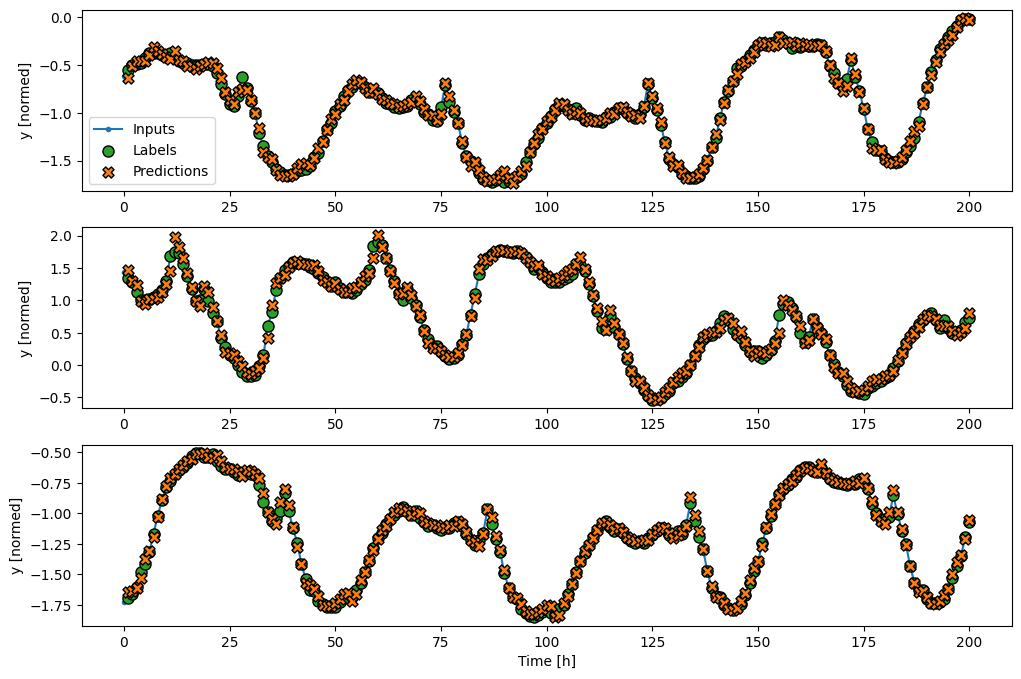

In [89]:
wide_RNN_window.plot(lstm_model)

In [90]:
wide_RNN_window.val.element_spec

(TensorSpec(shape=(None, 200, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 200, 1), dtype=tf.float32, name=None))

In [91]:
less_wide_RNN_window = u.WindowGenerator(
    input_width=50, label_width=50, shift=1,
    label_columns=['y'])

get attr
none


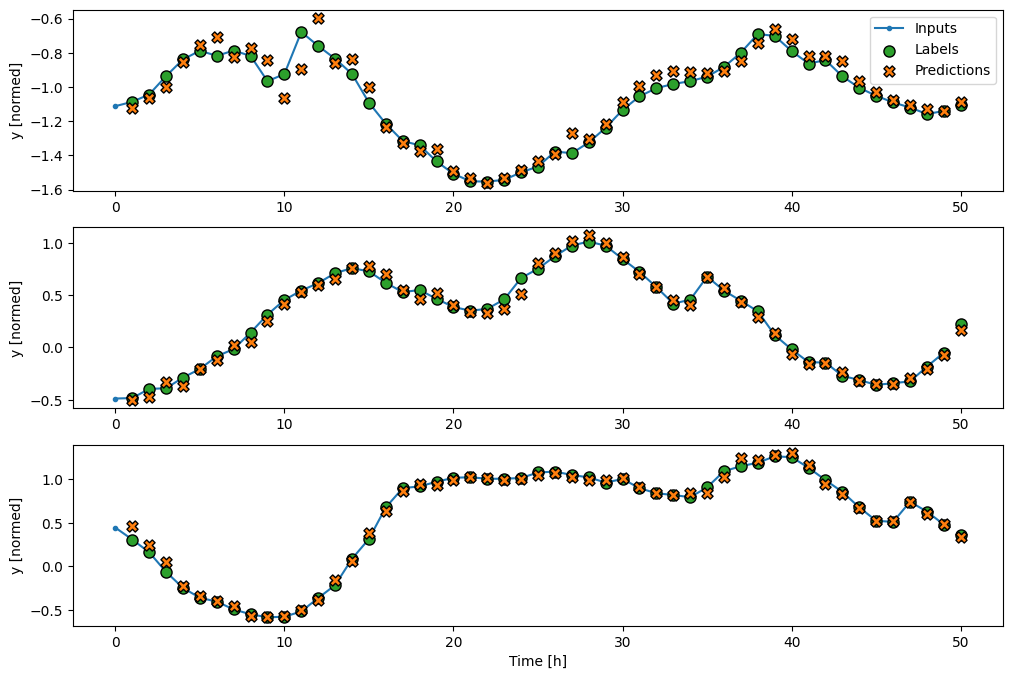

In [92]:
less_wide_RNN_window.plot(lstm_model)